<h1> Navigation </h1>
<a  id="navi"> </a>
<ol>
<li>The first attempt. Dataset is taken without any modification</li>

[The beginning](#1) <br>
[Result](#1_res)
<br>

<li>The second attempt. MinMaxScaler and get_dummies</li>

[The beginning](#2) <br>
[Result](#2_res)
<br>

<li>The third attempt. MinMaxScaler and get_dummies, deleted outliers</li>

[The beginning](#3) <br>
[Result](#3_res)
<br>

<li>The fourth attempt. Less dummies, convert exponencial distribution to normal, still MinMaxScaler</li>

[The beginning](#4) <br>
[Result](#4_res)
<br>

<li>Final comparison and visualization</li>

[Go to the end, no more boring code!](#final) <br>
<br>
</ol>

---

In [625]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [626]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [627]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout  
from tensorflow.keras.callbacks import EarlyStopping

In [628]:
heart_disease_dataset = pd.read_csv('HeartDiseaseDataset.csv')
rng = 42

<h2> The first attempt without any modification </h2>
<a  id="1"> </a>

[Back to Navigation](#navi)

In [629]:
features_train = heart_disease_dataset.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(
    heart_disease_dataset[features_train],
    heart_disease_dataset.target,test_size=0.3,shuffle=True,
    random_state=rng)

In [630]:
decision_tree = DecisionTreeClassifier(random_state=rng)
decision_tree.fit(X_train,y_train)
tree_pred = decision_tree.predict(X_test)

In [631]:
rf = RandomForestClassifier(random_state=rng)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [632]:
svclassifier = SVC(kernel='linear', random_state=rng)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [633]:
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)

In [634]:
svclassifier = SVC(kernel='poly', random_state=rng)
svclassifier.fit(X_train, y_train)
y2_pred = svclassifier.predict(X_test)

In [635]:
regr = LogisticRegression(random_state=rng) 
regr.fit(X_train, y_train)
Log_pred = regr.predict(X_test)

In [636]:
model = Sequential()
model.add(Dense(7, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=8, \
                          verbose=1, mode='auto')

callbacks_list = [earlystop]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_without_early=model.fit(X_train, y_train, validation_split=0.35, epochs=200, batch_size=64)

Epoch 1/200
3/3 [==============================] - 1s 84ms/step - loss: 69.0167 - accuracy: 0.4453 - val_loss: 62.0431 - val_accuracy: 0.4800
Epoch 2/200
3/3 [==============================] - 0s 17ms/step - loss: 65.7380 - accuracy: 0.4453 - val_loss: 59.0323 - val_accuracy: 0.4800
Epoch 3/200
3/3 [==============================] - 0s 20ms/step - loss: 62.6263 - accuracy: 0.4453 - val_loss: 56.0053 - val_accuracy: 0.4800
Epoch 4/200
3/3 [==============================] - 0s 22ms/step - loss: 59.4080 - accuracy: 0.4453 - val_loss: 53.0466 - val_accuracy: 0.4800
Epoch 5/200
3/3 [==============================] - 0s 22ms/step - loss: 56.1836 - accuracy: 0.4453 - val_loss: 50.1630 - val_accuracy: 0.4800
Epoch 6/200
3/3 [==============================] - 0s 20ms/step - loss: 52.9755 - accuracy: 0.4453 - val_loss: 47.3326 - val_accuracy: 0.4800
Epoch 7/200
3/3 [==============================] - 0s 19ms/step - loss: 49.9565 - accuracy: 0.4453 - val_loss: 44.5085 - val_accuracy: 0.4800
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


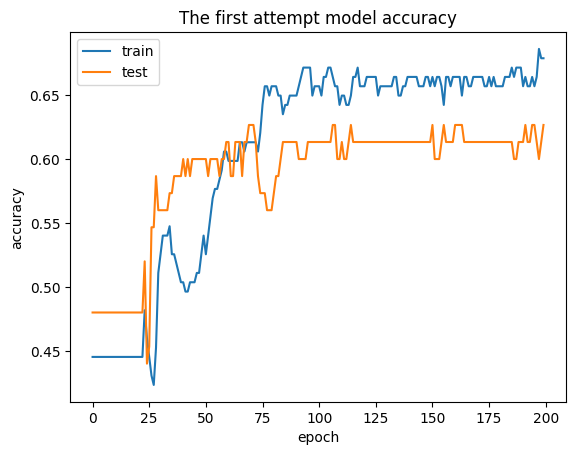

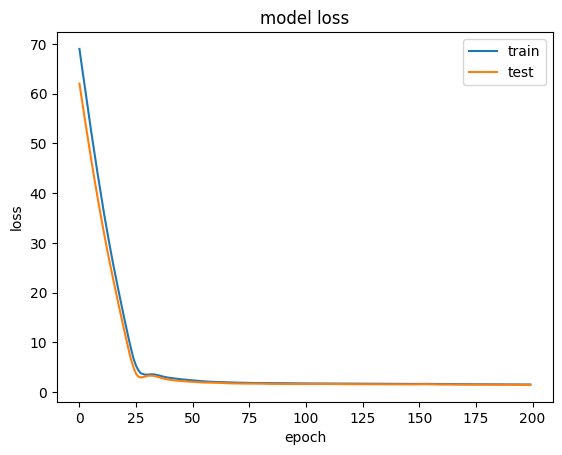

In [637]:
print(model_without_early.history.keys())
# summarize history for accuracy
plt.plot(model_without_early.history['accuracy'])
plt.plot(model_without_early.history['val_accuracy'])
plt.title('The first attempt model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_without_early.history['loss'])
plt.plot(model_without_early.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<h3>Result</h3>
The first attempt
<a  id="1_res"> </a>

[Back to Navigation](#navi)

In [638]:
print('Decision Tree:', accuracy_score(y_test, tree_pred)*100,'%')
print('Random Forest:', accuracy_score(y_test, rf_pred)*100,'%')
print('KNeighbors:',accuracy_score(y_test, KN_pred)*100,'%')
print('SVM:',accuracy_score(y_test, y_pred)*100,'%')
print('Non-Linear SVM', accuracy_score(y_test, y2_pred)*100, '%')
print('Log Ress', accuracy_score(y_test, Log_pred)*100, '%')
print('Neural Net', np.mean(model_without_early.history['val_accuracy'][-5:])*100, '%')


Decision Tree: 73.62637362637363 %
Random Forest: 82.41758241758241 %
KNeighbors: 65.93406593406593 %
SVM: 81.31868131868131 %
Non-Linear SVM 70.32967032967034 %
Log Ress 81.31868131868131 %
Neural Net 61.60000085830688 %


In [639]:
attempts = pd.DataFrame([[accuracy_score(y_test, tree_pred)*100, 
                accuracy_score(y_test, rf_pred)*100, 
                accuracy_score(y_test, KN_pred)*100,
                accuracy_score(y_test, y_pred)*100,
                accuracy_score(y_test, y2_pred)*100,
                accuracy_score(y_test, Log_pred)*100,
                np.mean(model_without_early.history['val_accuracy'][-5:])*100]],
                index = ['first_attempt'],
                columns = ['Decision Tree', 'Random Forest', 'KNeighbors',
                            'SVM', 'Non-Linear SVM', 'Log Ress', 'Neural Net'])

In [640]:
attempts

,Decision Tree,Random Forest,KNeighbors,SVM,Non-Linear SVM,Log Ress,Neural Net
first_attempt,73.626374,82.417582,65.934066,81.318681,70.32967,81.318681,61.600001


<h3> The second attempt. MinMaxscale and get_dummies </h3>
<a  id="2"> </a>

[Back to Navigation](#navi)

In [641]:
features_train = heart_disease_dataset.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(
    heart_disease_dataset[features_train],
    heart_disease_dataset.target,test_size=0.3,shuffle=True,
    random_state=rng)

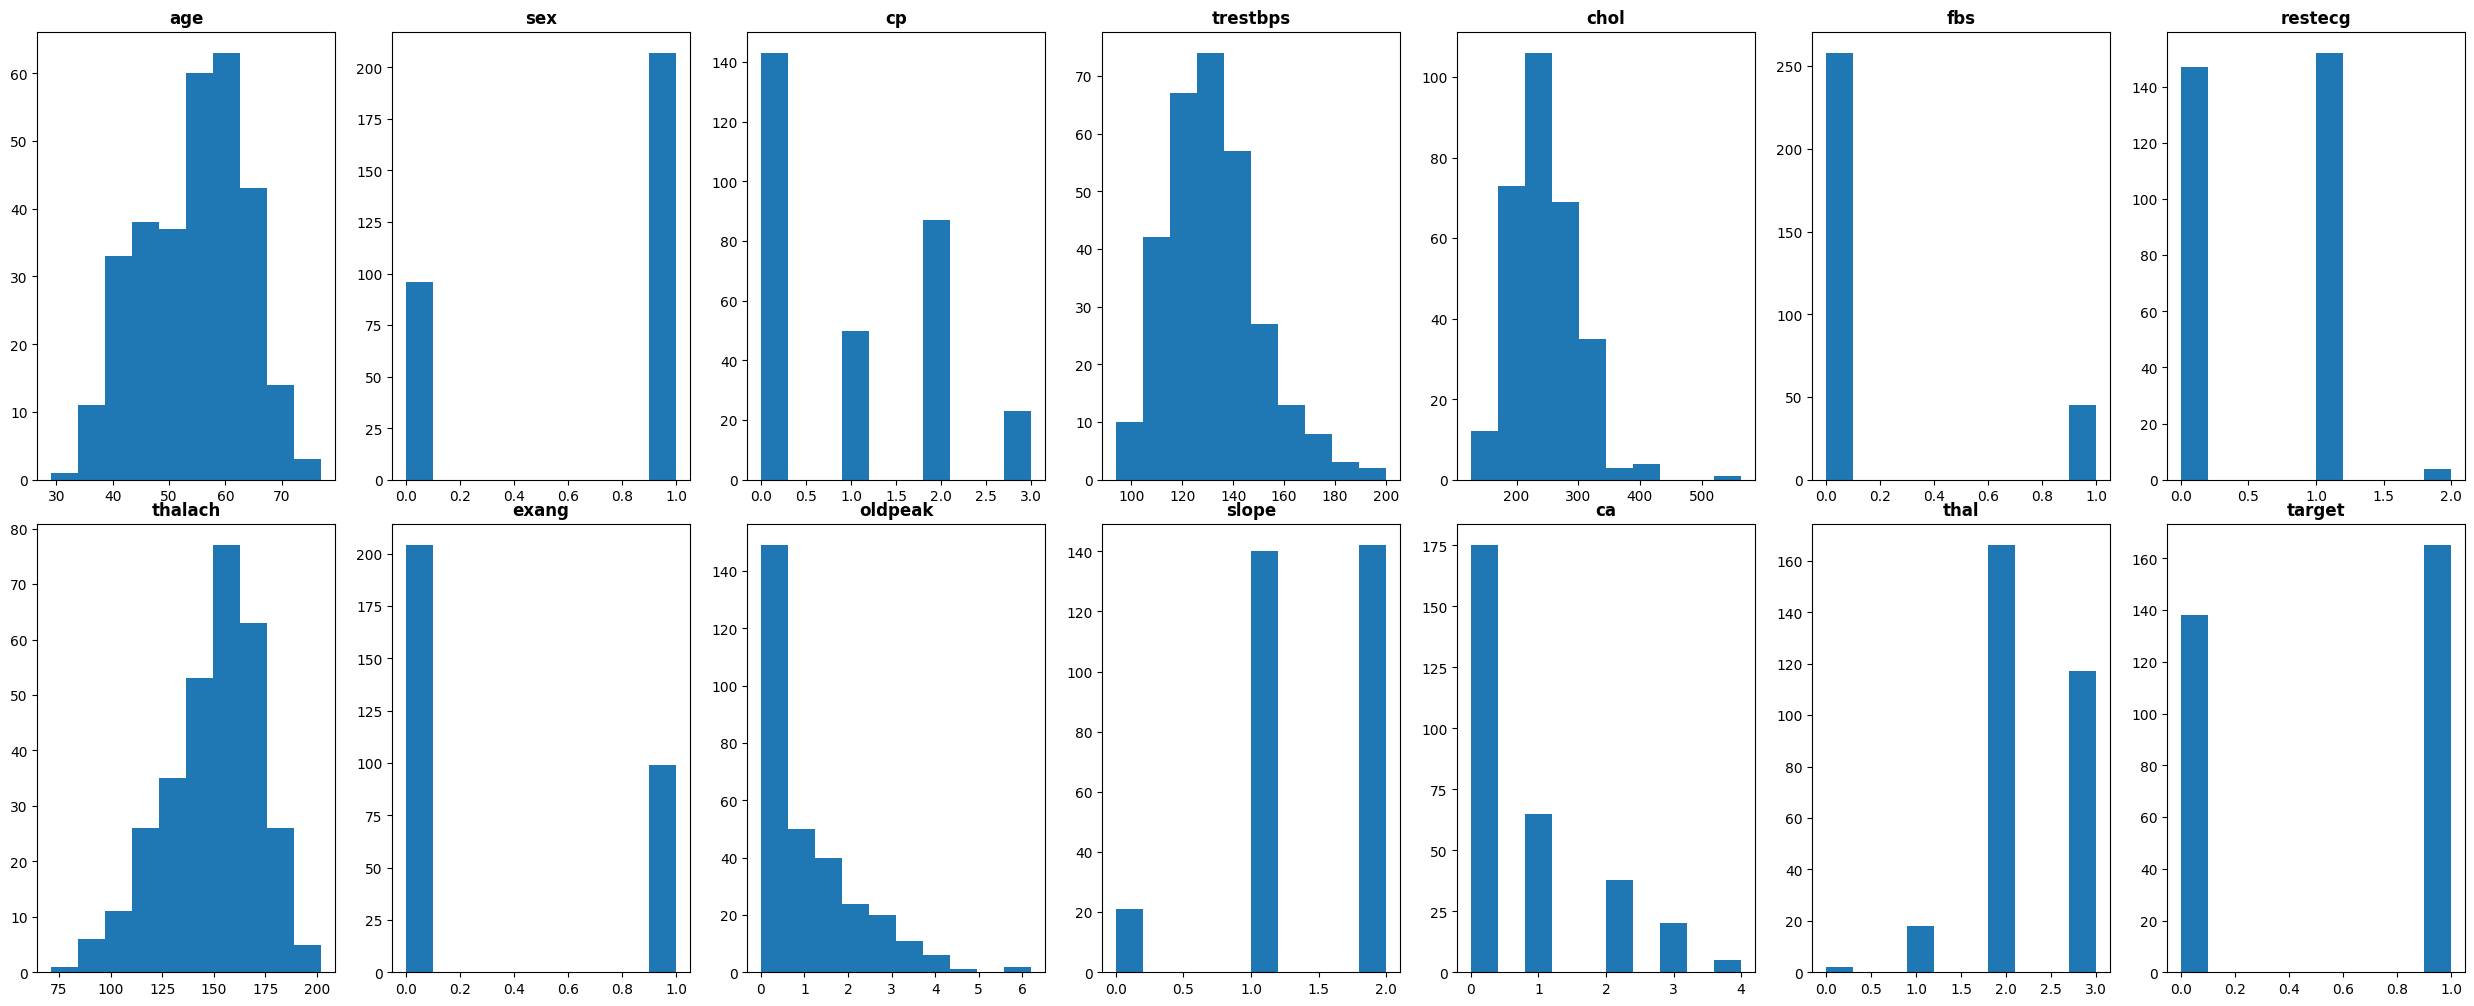

In [642]:
# Let's try to find out the distribution of every feature. First of all, I'm going to use this to choose a right scale.

rows, cols = 2, 7
fig, axs = plt.subplots(rows, cols, figsize = (25, 10))
fig.tight_layout()
for row in range(rows):
    for col in range(cols):
        axs[row, col].hist(heart_disease_dataset.iloc[:, 7*row + col], bins=10)
        axs[row, col].set_title(heart_disease_dataset.columns[7*row + col], fontweight = "bold")
plt.show()

# Age, trestbps, chol, thalach, oldpeak look as if they have a specific distribution. 
# Other features are ordinal. We can also guess it from the description on the website.

In [643]:
# I'm being honest, I'm not a pro in distributions. However, my hunches:
# Age - power normal
# trestbps, choi - gamma
# thalach - power normal
# oldpeak - exponential
# I'll try MinMaxScaler for these feauters at first anyway. We'll see that it may be better to use StandardScaler for oldpeak...

In [644]:
from sklearn.preprocessing import MinMaxScaler


features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = MinMaxScaler()
scaler.fit(heart_disease_dataset[features_to_scale])
scaled_features = pd.DataFrame(
    data=scaler.transform(heart_disease_dataset[features_to_scale]),
    columns = heart_disease_dataset[features_to_scale].columns,
    index=heart_disease_dataset[features_to_scale].index)
    
scaled_dataset = heart_disease_dataset.copy()
scaled_dataset[features_to_scale] = scaled_features
scaled_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


In [645]:
# Let's create dummies for the ordinal data
feature_dummies = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df = scaled_dataset.copy()
for feature in feature_dummies:
    dummies = pd.get_dummies(scaled_dataset[feature], prefix=feature)
    df = pd.concat([df, dummies], axis = 1)
    df.drop(feature, axis=1, inplace=True)
scaled_dummy_dataset = df.copy()
scaled_dummy_dataset = scaled_dummy_dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'target']]
scaled_dummy_dataset.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
0,0.708333,0.481132,0.244292,0.603053,0.370968,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,0.166667,0.339623,0.283105,0.885496,0.564516,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
2,0.250000,0.339623,0.178082,0.770992,0.225806,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
3,0.562500,0.245283,0.251142,0.816794,0.129032,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1
4,0.583333,0.245283,0.520548,0.702290,0.096774,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [646]:
features_train = scaled_dummy_dataset.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(
    scaled_dummy_dataset[features_train],
    scaled_dummy_dataset.target,test_size=0.3,shuffle=True,
    random_state=rng)

In [647]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
124,0.208333,0.000000,0.166667,0.824427,0.000000,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
72,0.000000,0.339623,0.178082,1.000000,0.000000,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
15,0.437500,0.245283,0.212329,0.664122,0.258065,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
10,0.520833,0.433962,0.257991,0.679389,0.193548,0,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
163,0.187500,0.415094,0.111872,0.778626,0.000000,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [648]:
decision_tree = DecisionTreeClassifier(random_state=rng)
decision_tree.fit(X_train,y_train)
tree_pred = decision_tree.predict(X_test)

In [649]:
rf = RandomForestClassifier(random_state=rng)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [650]:
svclassifier = SVC(kernel='linear', random_state=rng)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [651]:
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)

In [652]:
svclassifier = SVC(kernel='poly', random_state=rng)
svclassifier.fit(X_train, y_train)
y2_pred = svclassifier.predict(X_test)

In [653]:
regr = LogisticRegression(random_state=rng) 
regr.fit(X_train, y_train)
Log_pred = regr.predict(X_test)

In [654]:
model = Sequential()
model.add(Dense(7, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=8, \
                          verbose=1, mode='auto')

callbacks_list = [earlystop]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_without_early=model.fit(X_train, y_train, validation_split=0.35, epochs=200, batch_size=64)

Epoch 1/200
3/3 [==============================] - 1s 92ms/step - loss: 0.7355 - accuracy: 0.4672 - val_loss: 0.6568 - val_accuracy: 0.5867
Epoch 2/200
3/3 [==============================] - 0s 18ms/step - loss: 0.7201 - accuracy: 0.4891 - val_loss: 0.6454 - val_accuracy: 0.6133
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 0.7066 - accuracy: 0.4891 - val_loss: 0.6338 - val_accuracy: 0.6000
Epoch 4/200
3/3 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.5474 - val_loss: 0.6225 - val_accuracy: 0.6133
Epoch 5/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6806 - accuracy: 0.5547 - val_loss: 0.6120 - val_accuracy: 0.6667
Epoch 6/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6682 - accuracy: 0.5766 - val_loss: 0.6024 - val_accuracy: 0.6533
Epoch 7/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6577 - accuracy: 0.5912 - val_loss: 0.5934 - val_accuracy: 0.6800
Epoch 8/200
3/3 [===

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


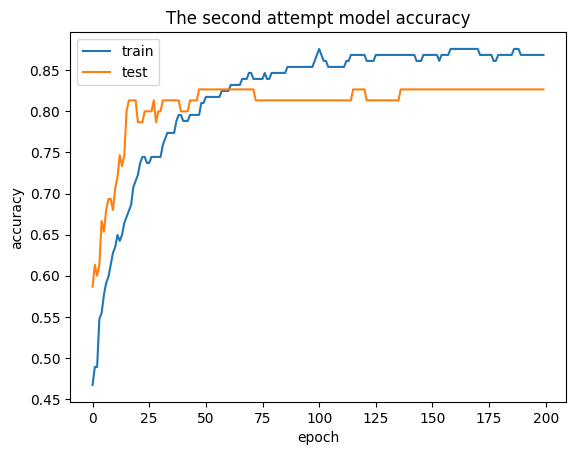

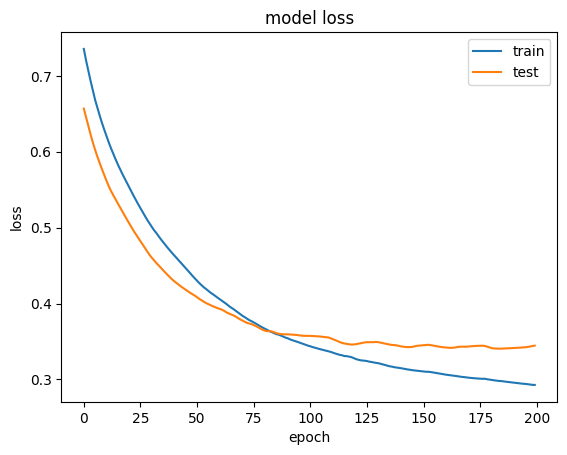

In [655]:
print(model_without_early.history.keys())
# summarize history for accuracy
plt.plot(model_without_early.history['accuracy'])
plt.plot(model_without_early.history['val_accuracy'])
plt.title('The second attempt model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_without_early.history['loss'])
plt.plot(model_without_early.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<h3> Result </h3>
<a  id="2_res"> </a>
The second attempt
<br>

[Back to Navigation](#navi)


In [656]:
print('Decision Tree:', accuracy_score(y_test, tree_pred)*100,'%')
print('Random Forest:', accuracy_score(y_test, rf_pred)*100,'%')
print('KNeighbors:',accuracy_score(y_test, KN_pred)*100,'%')
print('SVM:',accuracy_score(y_test, y_pred)*100,'%')
print('Non-Linear SVM', accuracy_score(y_test, y2_pred)*100, '%')
print('Log Ress', accuracy_score(y_test, Log_pred)*100, '%')
print('Neural Net', np.mean(model_without_early.history['val_accuracy'][-5:])*100, '%')

Decision Tree: 78.02197802197803 %
Random Forest: 82.41758241758241 %
KNeighbors: 81.31868131868131 %
SVM: 85.71428571428571 %
Non-Linear SVM 85.71428571428571 %
Log Ress 83.51648351648352 %
Neural Net 82.66666531562805 %


In [657]:
second_attempt = pd.DataFrame([[accuracy_score(y_test, tree_pred)*100, 
                accuracy_score(y_test, rf_pred)*100, 
                accuracy_score(y_test, KN_pred)*100,
                accuracy_score(y_test, y_pred)*100,
                accuracy_score(y_test, y2_pred)*100,
                accuracy_score(y_test, Log_pred)*100,
                np.mean(model_without_early.history['val_accuracy'][-5:])*100]],
                index=['second_attempt'],
                columns = ['Decision Tree', 'Random Forest', 'KNeighbors',
                            'SVM', 'Non-Linear SVM', 'Log Ress', 'Neural Net'])
attempts = pd.concat([attempts, second_attempt])

<h3> The third attempt. As the second, but without outliers </h3>
<a  id="3"> </a>

[Back to Navigation](#navi)

As we saw from the previous attempt, the "age", "trestbpx", "chol", "thalach", and "oldpeak" features have a numeric type, so we can find and delete outliers. Let's use the Chauvenet criterion.

In [658]:
from scipy.special import erfc


def chauvenet(array):
    mean = array.mean()
    stdv = array.std()
    criterion = 1.0/(2*(len(array)))
    d = abs(array - mean)/stdv
    prob = erfc(d)
    return prob < criterion

In [659]:
num_outliers = pd.Series(dtype='float64')
features_with_outliers = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in features_with_outliers:
    num_outliers[feature] = chauvenet(heart_disease_dataset[feature]).sum()
print(num_outliers)

age         5
trestbps    9
chol        6
thalach     8
oldpeak     9
dtype: int64


In [660]:
dataset_no_outliers = heart_disease_dataset.copy()
for feature in features_with_outliers:
    dataset_no_outliers[feature + ' outliers'] = chauvenet(dataset_no_outliers[feature])
features_outliers = []
for feature in features_with_outliers:
    features_outliers.append(feature + ' outliers')
dataset_no_outliers
for feature in features_outliers:
    dataset_no_outliers = dataset_no_outliers[dataset_no_outliers[feature] == False]

dataset_no_outliers.drop(columns=features_outliers, inplace=True)

In [661]:
from sklearn.preprocessing import MinMaxScaler


features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = MinMaxScaler()
scaler.fit(dataset_no_outliers[features_to_scale])
scaled_features = pd.DataFrame(
    data=scaler.transform(dataset_no_outliers[features_to_scale]),
    columns = dataset_no_outliers[features_to_scale].columns,
    index=dataset_no_outliers[features_to_scale].index)
    
scaled_dataset = dataset_no_outliers.copy()
scaled_dataset[features_to_scale] = scaled_features
scaled_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.717949,1,3,0.671053,0.445415,1,0,0.536842,0,0.638889,0,0,1,1
1,0.051282,1,2,0.473684,0.519651,0,1,0.926316,0,0.972222,0,0,2,1
2,0.153846,0,1,0.473684,0.318777,0,0,0.768421,0,0.388889,2,0,2,1
3,0.538462,1,1,0.342105,0.458515,0,1,0.831579,0,0.222222,2,0,2,1
4,0.564103,0,0,0.342105,0.973799,0,1,0.673684,1,0.166667,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.564103,0,0,0.605263,0.480349,0,1,0.252632,1,0.055556,1,0,3,0
299,0.256410,1,3,0.210526,0.580786,0,1,0.347368,0,0.333333,1,0,3,0
300,0.846154,1,0,0.657895,0.270742,1,1,0.442105,0,0.944444,1,2,3,0
301,0.564103,1,0,0.473684,0.000000,0,1,0.168421,1,0.333333,1,1,3,0


In [662]:
# Let's create dummies for the ordinal data
feature_dummies = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df = scaled_dataset.copy()
for feature in feature_dummies:
    dummies = pd.get_dummies(scaled_dataset[feature], prefix=feature)
    df = pd.concat([df, dummies], axis = 1)
    df.drop(feature, axis=1, inplace=True)
scaled_dummy_dataset = df.copy()
scaled_dummy_dataset = scaled_dummy_dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'target']];

In [663]:
features_train = scaled_dummy_dataset.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(
    scaled_dummy_dataset[features_train],
    scaled_dummy_dataset.target,test_size=0.3,shuffle=True,
    random_state=rng)

In [664]:
decision_tree = DecisionTreeClassifier(random_state=rng)
decision_tree.fit(X_train,y_train)
tree_pred = decision_tree.predict(X_test)

In [665]:
rf = RandomForestClassifier(random_state=rng)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [666]:
svclassifier = SVC(kernel='linear', random_state=rng)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [667]:
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)

In [668]:
svclassifier = SVC(kernel='poly', random_state=rng)
svclassifier.fit(X_train, y_train)
y2_pred = svclassifier.predict(X_test)

In [669]:
regr = LogisticRegression(random_state=rng) 
regr.fit(X_train, y_train)
Log_pred = regr.predict(X_test)

In [670]:
model = Sequential()
model.add(Dense(7, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=8, \
                          verbose=1, mode='auto')

callbacks_list = [earlystop]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_without_early=model.fit(X_train, y_train, validation_split=0.35, epochs=200, batch_size=64)

Epoch 1/200
2/2 [==============================] - 1s 194ms/step - loss: 0.6848 - accuracy: 0.5492 - val_loss: 0.6572 - val_accuracy: 0.6119
Epoch 2/200
2/2 [==============================] - 0s 35ms/step - loss: 0.6785 - accuracy: 0.5902 - val_loss: 0.6530 - val_accuracy: 0.6119
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 0.6730 - accuracy: 0.6230 - val_loss: 0.6487 - val_accuracy: 0.6269
Epoch 4/200
2/2 [==============================] - 0s 36ms/step - loss: 0.6671 - accuracy: 0.6311 - val_loss: 0.6445 - val_accuracy: 0.6716
Epoch 5/200
2/2 [==============================] - 0s 38ms/step - loss: 0.6615 - accuracy: 0.6475 - val_loss: 0.6405 - val_accuracy: 0.6716
Epoch 6/200
2/2 [==============================] - 0s 35ms/step - loss: 0.6558 - accuracy: 0.6557 - val_loss: 0.6364 - val_accuracy: 0.6716
Epoch 7/200
2/2 [==============================] - 0s 32ms/step - loss: 0.6503 - accuracy: 0.6803 - val_loss: 0.6323 - val_accuracy: 0.6716
Epoch 8/200
2/2 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


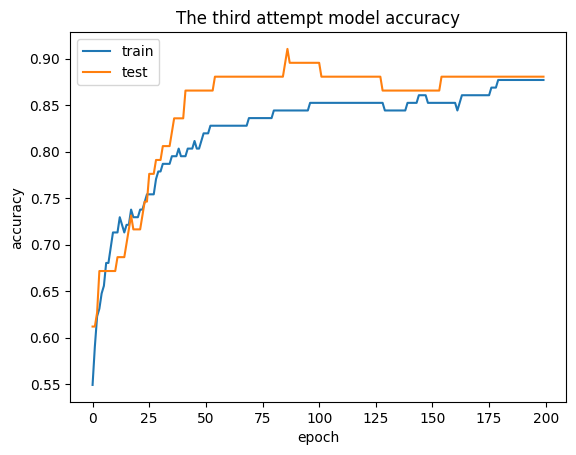

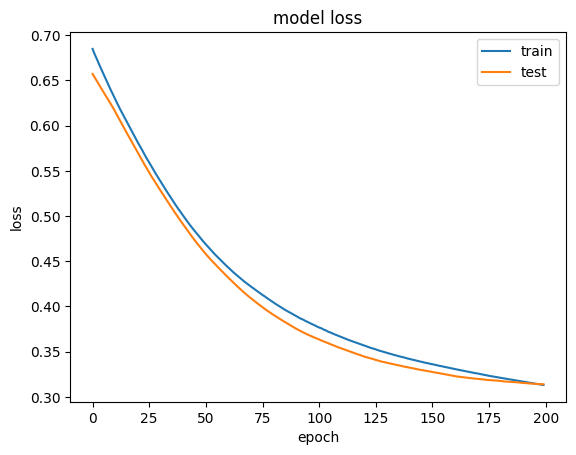

In [671]:
print(model_without_early.history.keys())
# summarize history for accuracy
plt.plot(model_without_early.history['accuracy'])
plt.plot(model_without_early.history['val_accuracy'])
plt.title('The third attempt model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_without_early.history['loss'])
plt.plot(model_without_early.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<h3> Result </h3>
<a  id="3_res"> </a>
The third attempt
<br>

[Back to Navigation](#navi)


In [672]:
print('Decision Tree:', accuracy_score(y_test, tree_pred)*100,'%')
print('Random Forest:', accuracy_score(y_test, rf_pred)*100,'%')
print('KNeighbors:',accuracy_score(y_test, KN_pred)*100,'%')
print('SVM:',accuracy_score(y_test, y_pred)*100,'%')
print('Non-Linear SVM', accuracy_score(y_test, y2_pred)*100, '%')
print('Log Ress', accuracy_score(y_test, Log_pred)*100, '%')
print('Neural Net', np.mean(model_without_early.history['val_accuracy'][-5:])*100, '%')

Decision Tree: 72.8395061728395 %
Random Forest: 80.24691358024691 %
KNeighbors: 82.71604938271605 %
SVM: 79.01234567901234 %
Non-Linear SVM 77.77777777777779 %
Log Ress 79.01234567901234 %
Neural Net 88.05969953536987 %


In [673]:
third_attempt = pd.DataFrame([[accuracy_score(y_test, tree_pred)*100, 
                accuracy_score(y_test, rf_pred)*100, 
                accuracy_score(y_test, KN_pred)*100,
                accuracy_score(y_test, y_pred)*100,
                accuracy_score(y_test, y2_pred)*100,
                accuracy_score(y_test, Log_pred)*100,
                np.mean(model_without_early.history['val_accuracy'][-5:])*100]],
                index=['third_attempt'],
                columns = ['Decision Tree', 'Random Forest', 'KNeighbors',
                            'SVM', 'Non-Linear SVM', 'Log Ress', 'Neural Net'])
attempts = pd.concat([attempts, third_attempt])

<h3> The fourth attempt. Less dummies, convert exponencial ditribution to normal, still MinMaxScaler </h3>
<a  id="4"> </a>

[Back to Navigation](#navi)

The "restecg" feature seems to have the meaning. As I read on the website, the bigger number in the feature we have, the bigger chance to get heart desease. I'm going to keep this value in the original view. Plus, the "oldpeak" feature has an exponential distribution, so I'll change it to normal

In [674]:
transformed_dataset = heart_disease_dataset.copy()

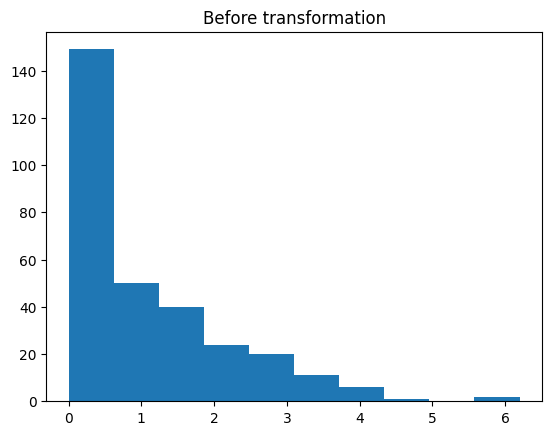

In [675]:
plt.figure()
plt.hist(heart_disease_dataset.oldpeak, bins=10)
plt.title("Before transformation")
plt.show()

In [676]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(heart_disease_dataset[['oldpeak']])

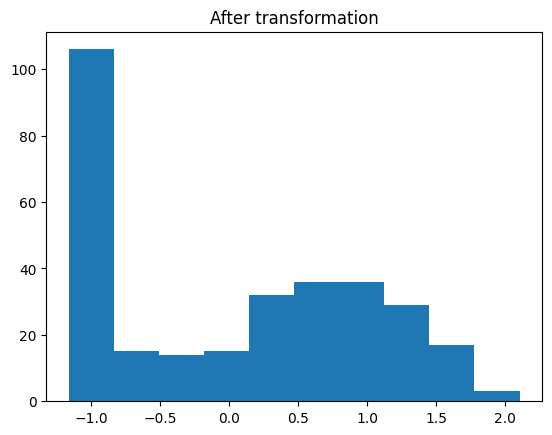

In [677]:
# I tried several options, but I still couldn't get a good normal distribution... So, we have what we have
plt.figure()
plt.hist(data_trans, bins='auto')
plt.title('After transformation')
plt.show()


In [678]:
transformed_dataset[['oldpeak']] = data_trans
transformed_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,1.180998,0,0,1,1
1,37,1,2,130,250,0,1,187,0,1.592215,0,0,2,1
2,41,0,1,130,204,0,0,172,0,0.686518,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.166444,2,0,2,1
4,57,0,0,120,354,0,1,163,1,-0.069148,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,-0.706744,1,0,3,0
299,45,1,3,110,264,0,1,132,0,0.537070,1,0,3,0
300,68,1,0,144,193,1,1,141,0,1.564525,1,2,3,0
301,57,1,0,130,131,0,1,115,1,0.537070,1,1,3,0


In [679]:
from sklearn.preprocessing import MinMaxScaler


features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = MinMaxScaler()
scaler.fit(transformed_dataset[features_to_scale])
scaled_features = pd.DataFrame(
    data=scaler.transform(transformed_dataset[features_to_scale]),
    columns = transformed_dataset[features_to_scale].columns,
    index=transformed_dataset[features_to_scale].index)
    
scaled_dataset = transformed_dataset.copy()
scaled_dataset[features_to_scale] = scaled_features
scaled_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.717078,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.842972,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.565692,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.406471,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.334344,2,0,2,1


In [680]:
# Let's create dummies for the ordinal data
feature_dummies = ['sex', 'cp', 'fbs', 'exang', 'slope', 'ca', 'thal']
df = scaled_dataset.copy()
for feature in feature_dummies:
    dummies = pd.get_dummies(scaled_dataset[feature], prefix=feature)
    df = pd.concat([df, dummies], axis = 1)
    df.drop(feature, axis=1, inplace=True)
scaled_dummy_dataset = df.copy()
scaled_dummy_dataset = scaled_dummy_dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'target']]
scaled_dummy_dataset.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
0,0.708333,0.481132,0.244292,0.603053,0.717078,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,0.166667,0.339623,0.283105,0.885496,0.842972,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
2,0.250000,0.339623,0.178082,0.770992,0.565692,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
3,0.562500,0.245283,0.251142,0.816794,0.406471,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1
4,0.583333,0.245283,0.520548,0.702290,0.334344,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [681]:
features_train = scaled_dummy_dataset.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(
    scaled_dummy_dataset[features_train],
    scaled_dummy_dataset.target,test_size=0.3,shuffle=True,
    random_state=rng)

In [682]:
decision_tree = DecisionTreeClassifier(random_state=rng)
decision_tree.fit(X_train,y_train)
tree_pred = decision_tree.predict(X_test)

In [683]:
rf = RandomForestClassifier(random_state=rng)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [684]:
svclassifier = SVC(kernel='linear', random_state=rng)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [685]:
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)

In [686]:
svclassifier = SVC(kernel='poly', random_state=rng)
svclassifier.fit(X_train, y_train)
y2_pred = svclassifier.predict(X_test)

In [687]:
regr = LogisticRegression(random_state=rng) 
regr.fit(X_train, y_train)
Log_pred = regr.predict(X_test)

In [688]:
model = Sequential()
model.add(Dense(7, input_dim=27, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=8, \
                          verbose=1, mode='auto')

callbacks_list = [earlystop]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_without_early=model.fit(X_train, y_train, validation_split=0.35, epochs=200, batch_size=64)

Epoch 1/200
3/3 [==============================] - 1s 100ms/step - loss: 0.7077 - accuracy: 0.5109 - val_loss: 0.7067 - val_accuracy: 0.4800
Epoch 2/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6988 - accuracy: 0.5109 - val_loss: 0.6977 - val_accuracy: 0.4800
Epoch 3/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6896 - accuracy: 0.5255 - val_loss: 0.6897 - val_accuracy: 0.4800
Epoch 4/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6819 - accuracy: 0.5328 - val_loss: 0.6823 - val_accuracy: 0.5200
Epoch 5/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6747 - accuracy: 0.5474 - val_loss: 0.6754 - val_accuracy: 0.5333
Epoch 6/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6679 - accuracy: 0.5839 - val_loss: 0.6687 - val_accuracy: 0.5467
Epoch 7/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6614 - accuracy: 0.5839 - val_loss: 0.6622 - val_accuracy: 0.5467
Epoch 8/200
3/3 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


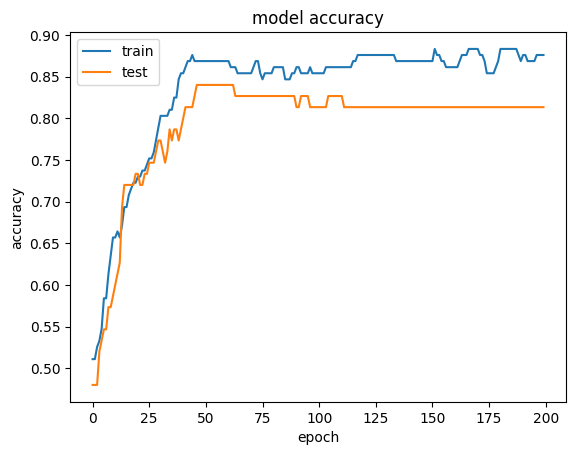

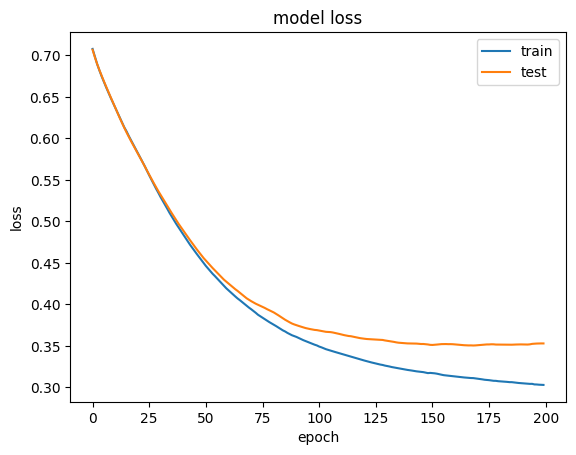

In [689]:
print(model_without_early.history.keys())
# summarize history for accuracy
plt.plot(model_without_early.history['accuracy'])
plt.plot(model_without_early.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_without_early.history['loss'])
plt.plot(model_without_early.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<h3>Result </h3>
<a  id="4_res"> </a>
The fourth attempt

[Back to Navigation](#navi)

In [690]:
print('Decision Tree:', accuracy_score(y_test, tree_pred)*100,'%')
print('Random Forest:', accuracy_score(y_test, rf_pred)*100,'%')
print('KNeighbors:',accuracy_score(y_test, KN_pred)*100,'%')
print('SVM:',accuracy_score(y_test, y_pred)*100,'%')
print('Non-Linear SVM', accuracy_score(y_test, y2_pred)*100, '%')
print('Log Ress', accuracy_score(y_test, Log_pred)*100, '%')
print('Neural Net', np.mean(model_without_early.history['val_accuracy'][-5:])*100, '%')

Decision Tree: 76.92307692307693 %
Random Forest: 82.41758241758241 %
KNeighbors: 83.51648351648352 %
SVM: 85.71428571428571 %
Non-Linear SVM 83.51648351648352 %
Log Ress 87.91208791208791 %
Neural Net 81.33333325386047 %


In [691]:
fourth_attempt = pd.DataFrame([[accuracy_score(y_test, tree_pred)*100, 
                accuracy_score(y_test, rf_pred)*100, 
                accuracy_score(y_test, KN_pred)*100,
                accuracy_score(y_test, y_pred)*100,
                accuracy_score(y_test, y2_pred)*100,
                accuracy_score(y_test, Log_pred)*100,
                np.mean(model_without_early.history['val_accuracy'][-5:])*100]],
                index=['fourth_attempt'],
                columns = ['Decision Tree', 'Random Forest', 'KNeighbors',
                            'SVM', 'Non-Linear SVM', 'Log Ress', 'Neural Net'])
attempts = pd.concat([attempts, fourth_attempt])

<h3> Final comparison with visualization </h3>
<a  id="final"> </a>

[Back to Navigation](#navi)

In [692]:
attempts

,Decision Tree,Random Forest,KNeighbors,SVM,Non-Linear SVM,Log Ress,Neural Net
first_attempt,73.626374,82.417582,65.934066,81.318681,70.329670,81.318681,61.600001
second_attempt,78.021978,82.417582,81.318681,85.714286,85.714286,83.516484,82.666665
third_attempt,72.839506,80.246914,82.716049,79.012346,77.777778,79.012346,88.059700
fourth_attempt,76.923077,82.417582,83.516484,85.714286,83.516484,87.912088,81.333333


	Decision Tree	Random Forest	KNeighbors	SVM	Non-Linear SVM	Log Ress	Neural Net
first_attempt	87.912088	86.813187	71.428571	85.714286	71.428571	89.010989	78.933334
second_attempt	84.615385	87.912088	89.010989	89.010989	84.615385	89.010989	81.333333
third_attempt	76.543210	86.419753	81.481481	83.950617	81.481481	86.419753	85.373135
fourth_attempt	83.516484	87.912088	91.208791	89.010989	86.813187	87.912088	83.199998

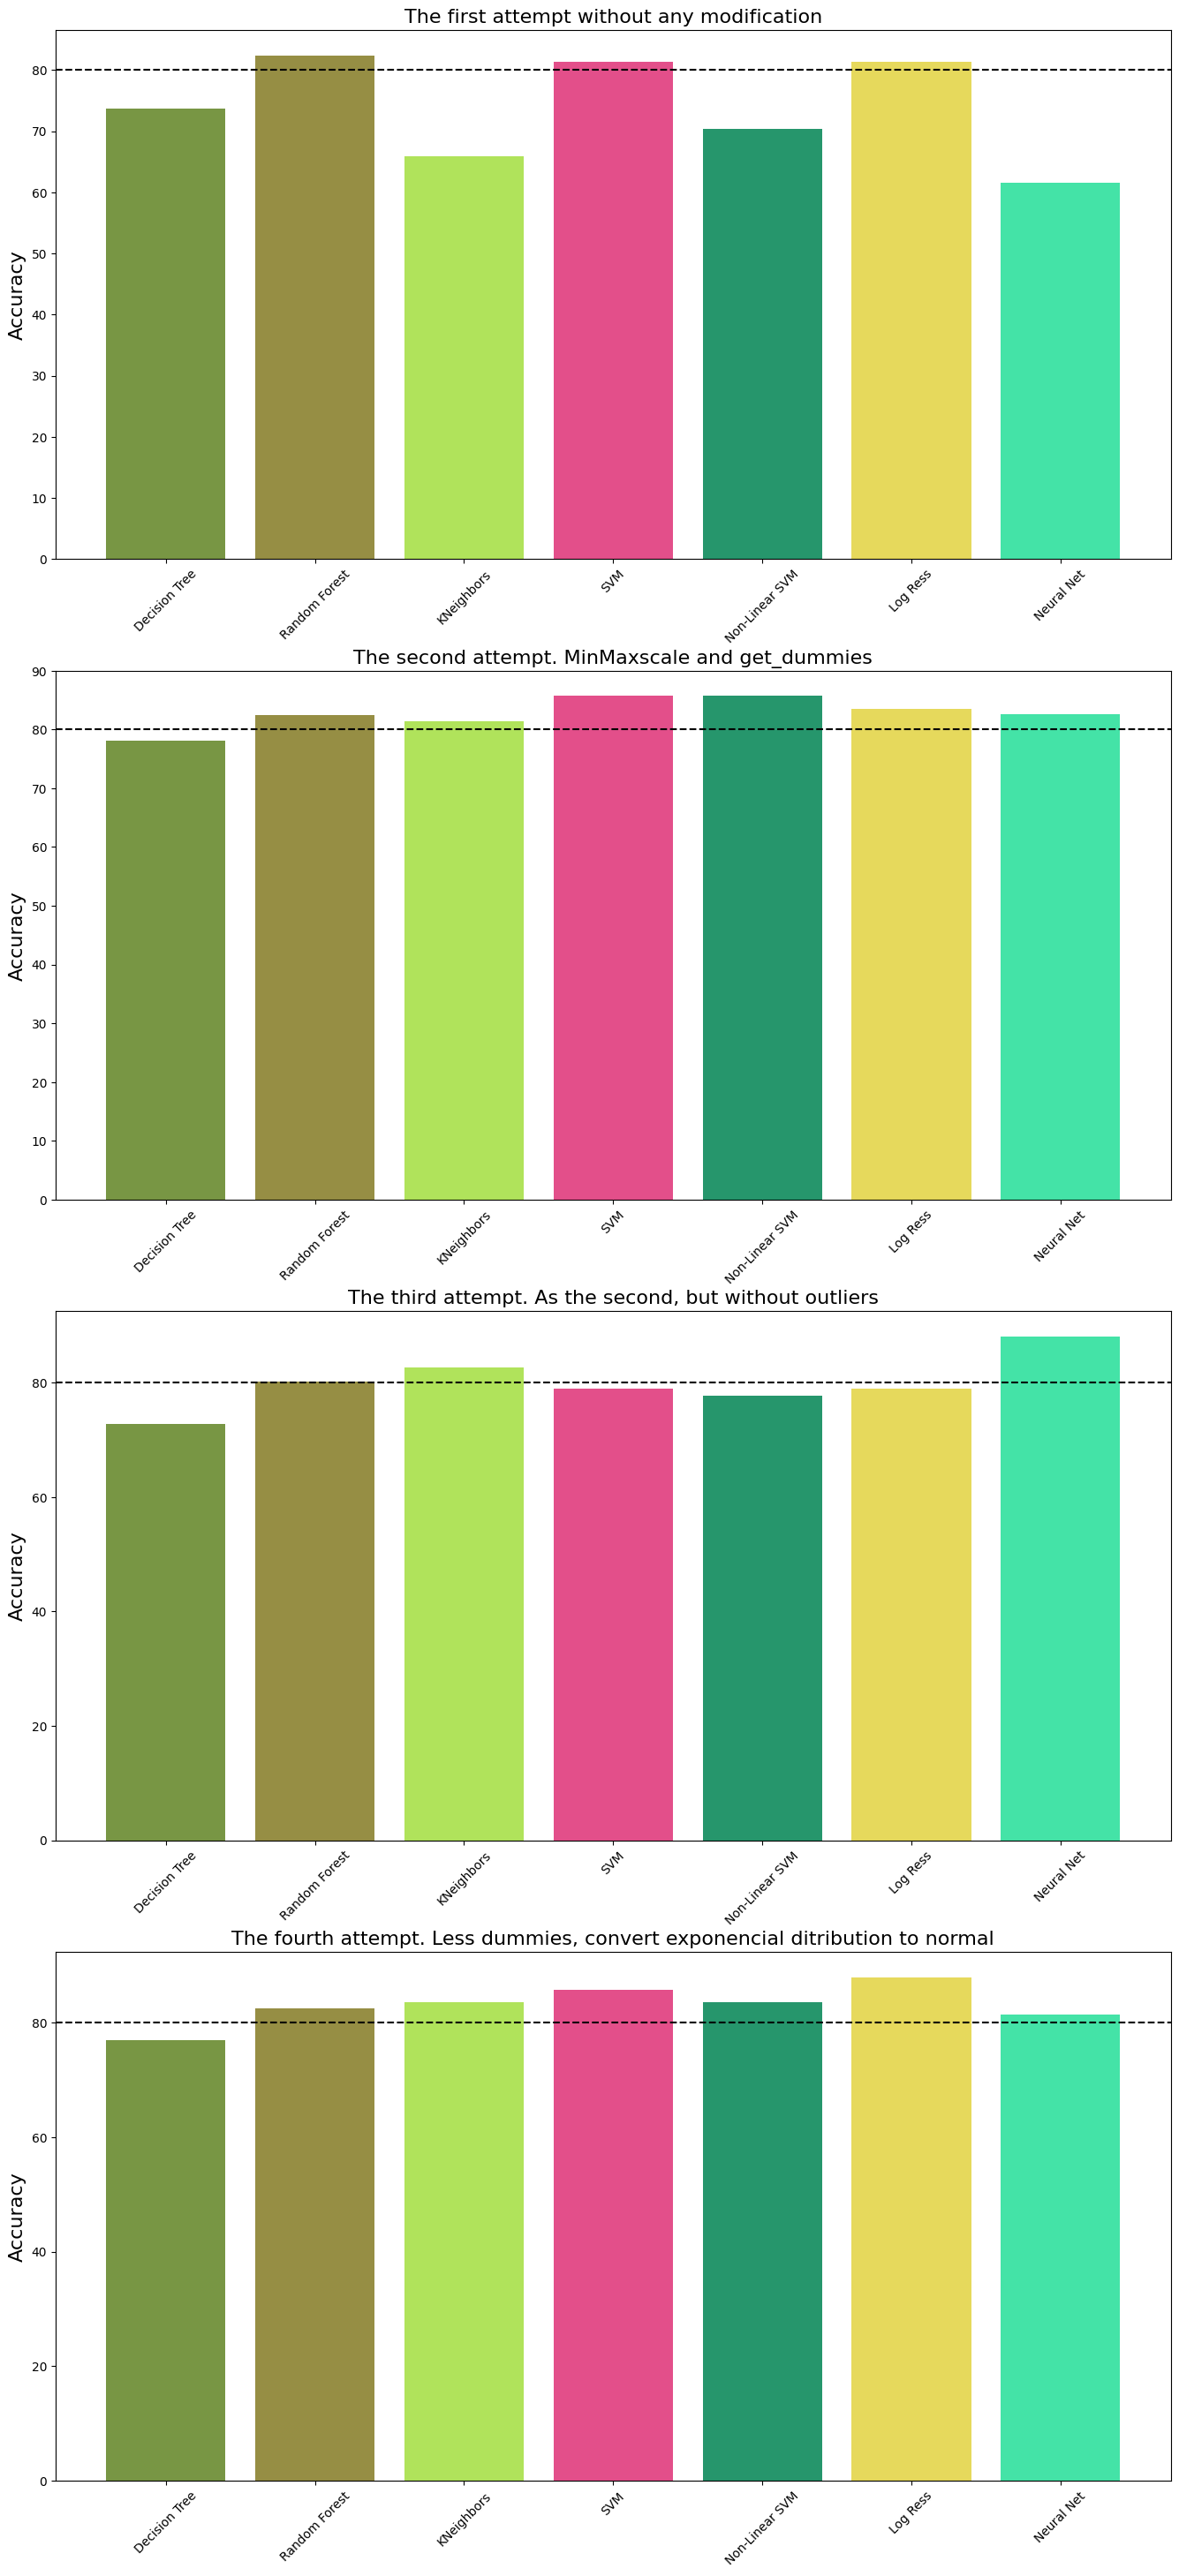

In [693]:
import warnings
warnings.filterwarnings('ignore')

# A blask line is used to show better the difference in accuracy between attempts

colors = ['#789644','#968E44', '#B0E35B', '#E34F8A', '#26966C', '#E6D95C', '#44E3A7']

fig, axes = plt.subplots(4, 1, figsize = (15, 30))
fig.tight_layout(pad=7)
for i in range(len(attempts.index)):
    axes[i].bar(attempts.columns, attempts.iloc[i, :], color=colors)
    axes[i].set_xticklabels(attempts.columns, rotation=45)
    axes[i].axhline(y = 80, color = 'k', linestyle = '--')
    axes[i].set_ylabel('Accuracy', fontsize = 16)

axes[0].set_title('The first attempt without any modification', fontsize = 16)
axes[1].set_title('The second attempt. MinMaxscale and get_dummies', fontsize = 16)
axes[2].set_title('The third attempt. As the second, but without outliers', fontsize = 16)
axes[3].set_title('The fourth attempt. Less dummies, convert exponencial ditribution to normal', fontsize = 16)

plt.show()

<h5> As we see, we aproached the similar results in the second and the fourth solutions. Specifically, the Neural Net gives us 93.3% of accuracy in the second attempt! </h5>